<h2>Exercise 1 - Why feature scaling is important for the k-means algorithm? Be specific.</h2>

**Answer:** Because of the Euclidean distance, if not on same scale, it will heavily impact results. 

<h2>Exercise 2 -  How can clustering be used to improve the performance of a linear model?</h2>

**Answer:** E - all the above

<h2>Exercise 3 -  What are the risks of initial random cluster centroids assignments in k-means? Be
specific.</h2>

**Answer:** The risk is a suboptimal solution. You could run the algorithm multiple times and keep the best results. 

<h2>Exercise 4 - Use Mall_Customers.csv datafile below</h2>

In [1]:
#4a - read the csv data file and create a data-frame called customers. Remove the observations with missing values.

import pandas as pd
import numpy as np

customers = pd.read_csv('Mall_Customers.csv')
customers = customers.dropna()
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#4b - Using the appropriate Python commands, put Gender, Age and Annual Income (k$) in the same scale.

from sklearn.preprocessing import MinMaxScaler

#Convert to numerical
customers['Gender'].replace(['Male', 'Female'], [1, 0], inplace= True)

#MinMaxScaler
scaler = MinMaxScaler()
customers[['Age', 'Gender', 'Annual Income (k$)']] = scaler.fit_transform(customers[['Age', 'Gender', 'Annual Income (k$)']])
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1.0,0.019231,0.000000,39
1,2,1.0,0.057692,0.000000,81
2,3,0.0,0.038462,0.008197,6
3,4,0.0,0.096154,0.008197,77
4,5,0.0,0.250000,0.016393,40


C:\Users\jt108\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jt108\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jt108\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jt108\AppData\Ro

Text(0, 0.5, 'Sil score')

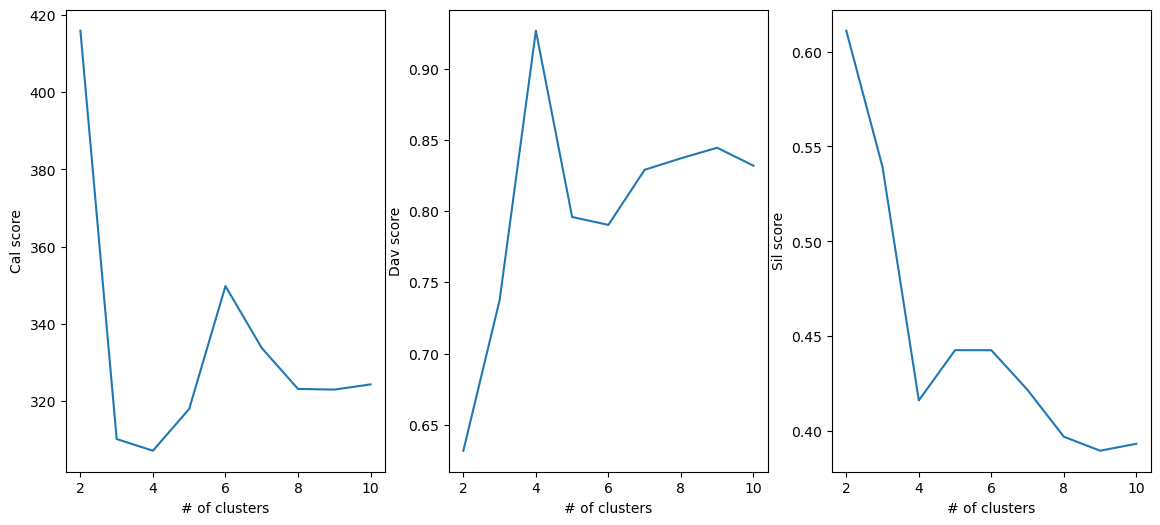

In [11]:
#4c - Because you are not familiar enough with buying patterns in malls, estimate the number of clusters 
#for this dataset using the Calinski-Harabasz, Davies-Bouldin, and Silhouette scores.

from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt

#Input
X = customers[['Age', 'Gender', 'Annual Income (k$)']]

#The clusters
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

#Empty lists to store scores
cal_score = list()
dav_score = list()
sil_score = list()

for i in clusters:

    #kmeans model
    KM_md = KMeans(n_clusters = i, n_init = 20).fit(X)
    
    #Calinski score
    cal_score.append(calinski_harabasz_score(X, KM_md.labels_))
    
    #Davies score
    dav_score.append(davies_bouldin_score(X, KM_md.labels_))
    
    #Silhouette score
    sil_score.append(silhouette_score(X, KM_md.labels_))


#Visualize the scores. Subplot to view them at same time
fig, axs = plt.subplots(1, 3, figsize = (14, 6)) #1 row, 3 columns

#Cal score. First column
axs[0].plot(clusters, cal_score)
axs[0].set_xlabel('# of clusters')
axs[0].set_ylabel('Cal score')

#Dav score. Second column
axs[1].plot(clusters, dav_score)
axs[1].set_xlabel('# of clusters')
axs[1].set_ylabel('Dav score')

#Sil score. Third column
axs[2].plot(clusters, sil_score)
axs[2].set_xlabel('# of clusters')
axs[2].set_ylabel('Sil score')

From the above, we see that Cal score and Sil score peak at 2, and they hit a big low at 4 clusters. All the clusters after that have nowhere near the same score

In [12]:
#4d - Using the results from part (c), cluster the data into that number of clusters (use n_init = 20).

KM_md = KMeans(n_clusters = 2, n_init = 20).fit(X)

#Labels
customers['Clusters'] = KM_md.labels_
customers.head()

C:\Users\jt108\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,1.0,0.019231,0.000000,39,1
1,2,1.0,0.057692,0.000000,81,1
2,3,0.0,0.038462,0.008197,6,0
3,4,0.0,0.096154,0.008197,77,0
4,5,0.0,0.250000,0.016393,40,0


In [14]:
#4e - Describe each of the clusters. Do the results make sense? If not, suggest how would improve this analysis.

#Cluster 0
cluster_0 = customers[customers['Clusters'] == 0]
cluster_0.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,112.000000,112.0,112.000000,112.000000,112.000000,112.0
mean,97.562500,0.0,0.386504,0.362705,51.526786,0.0
std,58.276412,0.0,0.243156,0.213213,24.114950,0.0
min,3.000000,0.0,0.000000,0.008197,5.000000,0.0
25%,46.750000,0.0,0.211538,0.202869,35.000000,0.0
50%,94.500000,0.0,0.326923,0.368852,50.000000,0.0
75%,148.250000,0.0,0.567308,0.510246,73.000000,0.0
max,197.000000,0.0,0.961538,0.909836,99.000000,0.0


In [15]:
#Cluster 1
cluster_1 = customers[customers['Clusters'] == 1]
cluster_1.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,88.000000,88.0,88.000000,88.000000,88.000000,88.0
mean,104.238636,1.0,0.419362,0.387109,48.511364,1.0
std,57.483830,0.0,0.298362,0.218347,27.896770,0.0
min,1.000000,1.0,0.000000,0.000000,1.000000,1.0
25%,59.500000,1.0,0.187500,0.250000,24.500000,1.0
50%,106.500000,1.0,0.365385,0.389344,50.000000,1.0
75%,151.250000,1.0,0.625000,0.516393,70.000000,1.0
max,200.000000,1.0,1.000000,1.000000,97.000000,1.0


From the above, we can conclude a few things:<br>

Cluster 0 is females and cluster 1 is males (because of the 0's and 1's).<br>
Cluster 0 average annual income is 36.2k.<br>
Cluster 1 average annual income is 38.7k.<br>
Cluster 0 average spending score is 51.5.<br>
Cluster 1 average spending score is 48.5.<br>

To improve results, we would need more clusters.